In [1]:
#Importing required libraries 
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#read dataset, reading csv files using pandas
data = pd.read_csv('diabetes.csv')

In [3]:
#looking at top n records
data.head() #specify the number required to display,

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#renaming column name
data.rename(columns={'Insulin':'InsulinValue'},inplace=True)

In [5]:
#checking is there any null values in the dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
InsulinValue                0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#describe dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
InsulinValue,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'InsulinValue'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

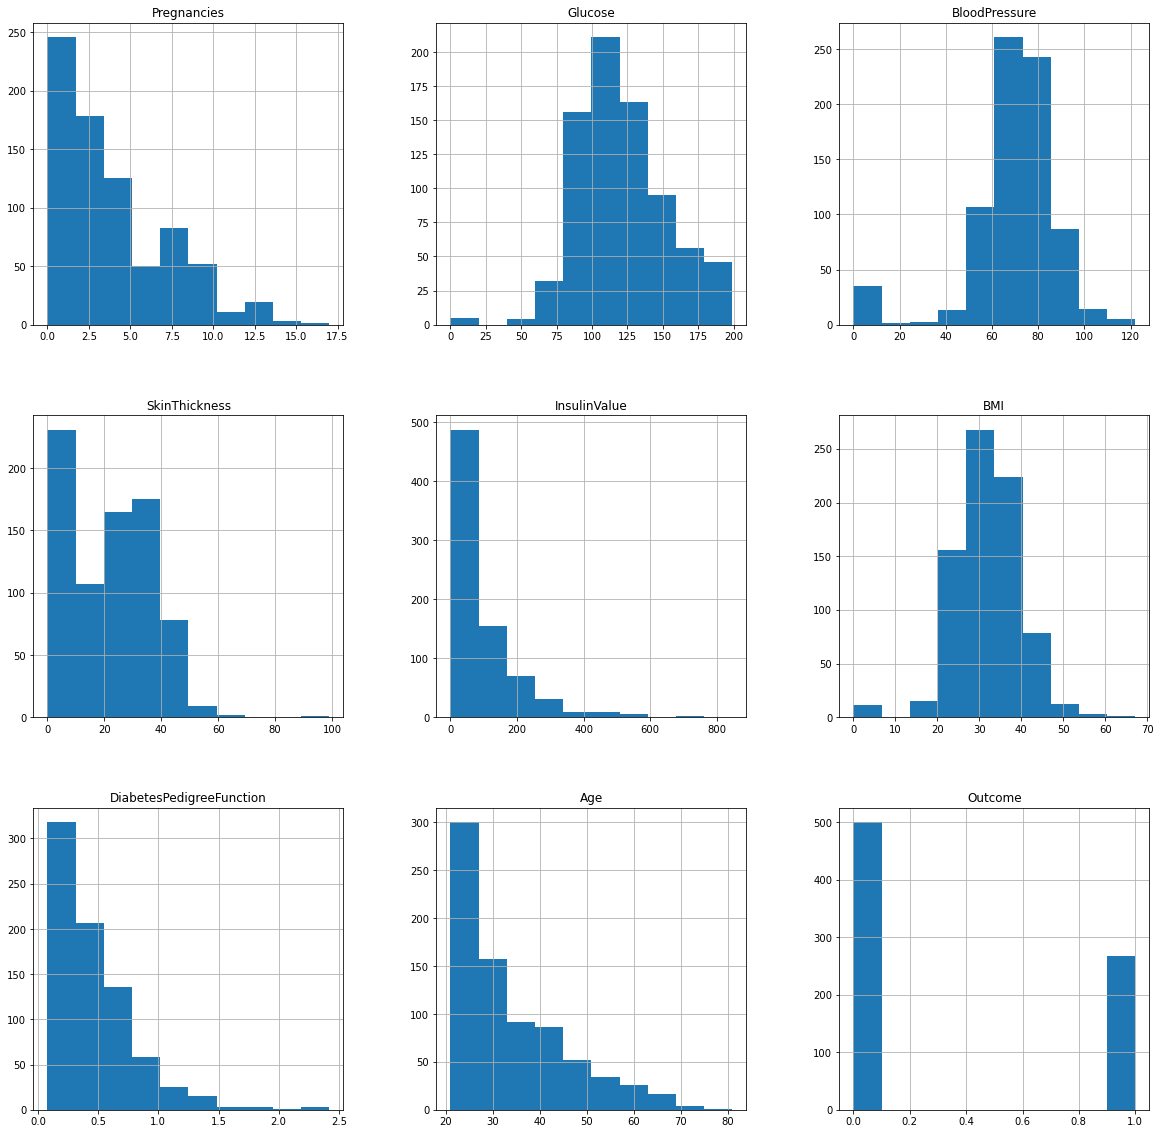

In [7]:
data.hist(figsize=(20,20))

In [8]:
cor_mat = data.corr()
cor_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

c:\Users\zolboy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,InsulinValue,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
InsulinValue,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [9]:
#separating diabetic/ healthy data
diabetes = data[data.Outcome != 0]
healthy = data[data.Outcome ==1]

In [10]:
die_data = data.Outcome.value_counts().values.tolist()
die_data_labels = ['Diabetes','Healthy']

([<matplotlib.patches.Wedge at 0x17369e9a5c8>,
 [Text(-0.5025943242672991, 0.9784676515931925, 'Diabetes'),
  Text(0.5025944158780503, -0.9784676045369114, 'Healthy')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65%'),
  Text(0.2741424086607547, -0.5337096024746789, '35%')])

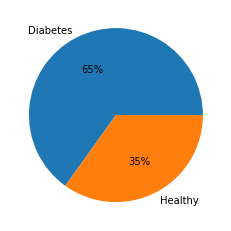

In [11]:
plt.pie(die_data,labels = die_data_labels,autopct='%.f%%')

In [12]:
data[['Glucose','BloodPressure','SkinThickness','InsulinValue','BMI']] = data[['Glucose','BloodPressure','SkinThickness','InsulinValue','BMI']].replace(0,np.NaN)
null_feat = pd.DataFrame(len(data['Outcome']) - data.isnull().sum(), columns = ['null_feature'])
null_feat

,null_feature
Pregnancies,768
Glucose,763
BloodPressure,733
SkinThickness,541
InsulinValue,394
BMI,757
DiabetesPedigreeFunction,768
Age,768
Outcome,768


In [13]:
percentage_null = pd.DataFrame((len(data['Outcome']) - (len(data['Outcome']) - data.isnull().sum()))/len(data['Outcome'])*100, columns = ['null_percent'])
percentage_null = percentage_null.round(2)
percentage_null

,null_percent
Pregnancies,0.00
Glucose,0.65
BloodPressure,4.56
SkinThickness,29.56
InsulinValue,48.70
BMI,1.43
DiabetesPedigreeFunction,0.00
Age,0.00
Outcome,0.00


<AxesSubplot:>

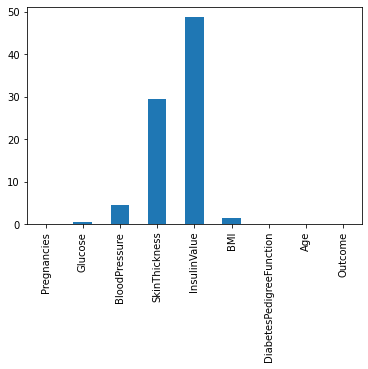

In [14]:
percentage_null['null_percent'].plot.bar()
